# Modules

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 기본
import re
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.externals import joblib 
from sklearn.metrics import make_scorer

# 회귀분석
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Deep Neural Network
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import layers
# from keras.layers.recurrent import LSTM
# from keras.models import Sequential
# import time

# # 설정
%matplotlib inline
pd.options.display.max_columns = 400
pd.options.display.float_format = '{:.5f}'.format



In [ ]:
print('Pandas : %s'%(pd.__version__))
print('Numpy : %s'%(np.__version__))
print('Scikit-Learn : %s'%(sklearn.__version__))
!python --version

In [ ]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [ ]:
import os

os.getcwd()

In [ ]:
data = pd.read_csv('201901-202003.csv')

In [ ]:
data.isnull().sum()

In [ ]:
# 날짜 처리
data = data.fillna('') # Null에 ''로 채워넣음
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
data = data.drop(['REG_YYMM'], axis=1)

In [ ]:
data.isnull().sum()

In [ ]:
# 데이터 정제
df = data.copy()
df = df.drop(['CARD_CCG_NM', 'HOM_CCG_NM'], axis=1) # 시군구에 대한 데이터 드랍

columns = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month']
df = df.groupby(columns).sum().reset_index(drop=False)


In [ ]:
df

In [12]:
# # 인코딩
# # data type이 object 일 때 encoder로 숫자를 부여 해준다.
# dtypes = df.dtypes
# encoders = {}
# for column in df.columns:
#     if str(dtypes[column]) == 'object':
#         encoder = LabelEncoder()
#         encoder.fit(df[column])
#         encoders[column] = encoder
        
# df_num = df.copy()        
# for column in encoders.keys():
#     encoder = encoders[column]
#     df_num[column] = encoder.transform(df[column])

In [13]:
submission = pd.read_csv('submission.csv', index_col=0)
submission = submission.loc[submission['REG_YYMM']==202004]

In [14]:
submission

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
id,,,,
0,202004,강원,건강보조식품 소매업,0
1,202004,강원,골프장 운영업,0
2,202004,강원,과실 및 채소 소매업,0
3,202004,강원,관광 민예품 및 선물용품 소매업,0
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,0
...,...,...,...,...
692,202004,충북,피자 햄버거 샌드위치 및 유사 음식점업,0
693,202004,충북,한식 음식점업,0
694,202004,충북,호텔업,0


In [ ]:
df_num

In [16]:
df_num_corr = df_num.corr()
df_num_corr

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,CSTMR_CNT,AMT,CNT
CARD_SIDO_NM,1.00000,-0.00881,0.13001,0.01306,0.00375,0.01510,-0.00699,0.00152,-0.04646,-0.04299,-0.03801
STD_CLSS_NM,-0.00881,1.00000,0.00640,-0.04434,-0.00424,-0.04209,0.00157,-0.00365,0.04581,0.03033,0.03814
HOM_SIDO_NM,0.13001,0.00640,1.00000,-0.00727,-0.00577,-0.00449,-0.00092,-0.00070,-0.04504,-0.04033,-0.03683
AGE,0.01306,-0.04434,-0.00727,1.00000,-0.02633,0.91476,-0.00775,0.00036,0.00181,0.03069,-0.00316
SEX_CTGO_CD,0.00375,-0.00424,-0.00577,-0.02633,1.00000,-0.00977,-0.00860,0.00308,-0.00230,-0.01230,-0.00652
FLC,0.01510,-0.04209,-0.00449,0.91476,-0.00977,1.00000,-0.00700,0.00099,0.00131,0.03142,-0.00390
year,-0.00699,0.00157,-0.00092,-0.00775,-0.00860,-0.00700,1.00000,-0.49157,-0.00040,0.00132,0.00044
month,0.00152,-0.00365,-0.00070,0.00036,0.00308,0.00099,-0.49157,1.00000,0.00151,0.00059,0.00194
CSTMR_CNT,-0.04646,0.04581,-0.04504,0.00181,-0.00230,0.00131,-0.00040,0.00151,1.00000,0.86132,0.94673
AMT,-0.04299,0.03033,-0.04033,0.03069,-0.01230,0.03142,0.00132,0.00059,0.86132,1.00000,0.76861


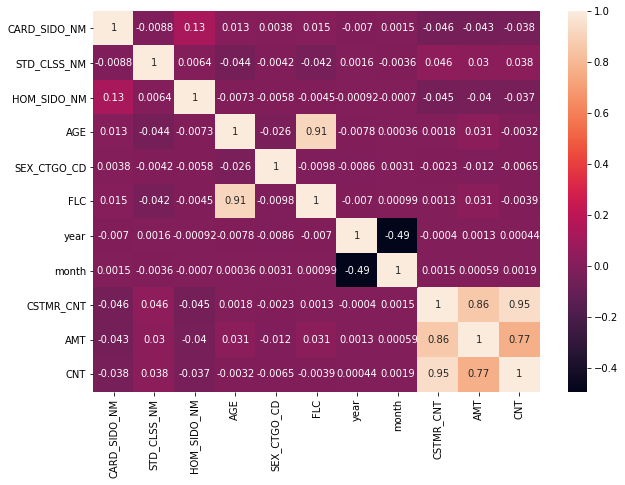

In [17]:
fig, ax =plt.subplots()
fig.set_size_inches(10,7)
sns.heatmap(df_num_corr, annot=True)

# one hot encoding

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df_1hot = pd.get_dummies(df,columns = ['year','month','SEX_CTGO_CD','CARD_SIDO_NM','STD_CLSS_NM', 'HOM_SIDO_NM','AGE'])
df_1hot

In [21]:
df_1hot_corr = df_1hot.corr()
df_1hot_corr

,FLC,CSTMR_CNT,AMT,CNT,year_2019,year_2020,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,SEX_CTGO_CD_1,SEX_CTGO_CD_2,CARD_SIDO_NM_강원,CARD_SIDO_NM_경기,CARD_SIDO_NM_경남,CARD_SIDO_NM_경북,CARD_SIDO_NM_광주,CARD_SIDO_NM_대구,CARD_SIDO_NM_대전,CARD_SIDO_NM_부산,CARD_SIDO_NM_서울,CARD_SIDO_NM_세종,CARD_SIDO_NM_울산,CARD_SIDO_NM_인천,CARD_SIDO_NM_전남,CARD_SIDO_NM_전북,CARD_SIDO_NM_제주,CARD_SIDO_NM_충남,CARD_SIDO_NM_충북,STD_CLSS_NM_건강보조식품 소매업,STD_CLSS_NM_골프장 운영업,STD_CLSS_NM_과실 및 채소 소매업,STD_CLSS_NM_관광 민예품 및 선물용품 소매업,STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업,STD_CLSS_NM_그외 기타 스포츠시설 운영업,STD_CLSS_NM_그외 기타 종합 소매업,STD_CLSS_NM_기타 대형 종합 소매업,STD_CLSS_NM_기타 수상오락 서비스업,STD_CLSS_NM_기타 외국식 음식점업,STD_CLSS_NM_기타 주점업,STD_CLSS_NM_기타음식료품위주종합소매업,STD_CLSS_NM_내항 여객 운송업,STD_CLSS_NM_마사지업,STD_CLSS_NM_면세점,STD_CLSS_NM_버스 운송업,STD_CLSS_NM_비알콜 음료점업,STD_CLSS_NM_빵 및 과자류 소매업,STD_CLSS_NM_서양식 음식점업,STD_CLSS_NM_수산물 소매업,STD_CLSS_NM_슈퍼마켓,STD_CLSS_NM_스포츠 및 레크레이션 용품 임대업,STD_CLSS_NM_여관업,STD_CLSS_NM_여행사업,STD_CLSS_NM_욕탕업,STD_CLSS_NM_육류 소매업,STD_CLSS_NM_일반유흥 주점업,STD_CLSS_NM_일식 음식점업,STD_CLSS_NM_자동차 임대업,STD_CLSS_NM_전시 및 행사 대행업,STD_CLSS_NM_정기 항공 운송업,STD_CLSS_NM_중식 음식점업,STD_CLSS_NM_차량용 가스 충전업,STD_CLSS_NM_차량용 주유소 운영업,STD_CLSS_NM_체인화 편의점,STD_CLSS_NM_택시 운송업,STD_CLSS_NM_피자 햄버거 샌드위치 및 유사 음식점업,STD_CLSS_NM_한식 음식점업,STD_CLSS_NM_호텔업,STD_CLSS_NM_화장품 및 방향제 소매업,STD_CLSS_NM_휴양콘도 운영업,HOM_SIDO_NM_강원,HOM_SIDO_NM_경기,HOM_SIDO_NM_경남,HOM_SIDO_NM_경북,HOM_SIDO_NM_광주,HOM_SIDO_NM_대구,HOM_SIDO_NM_대전,HOM_SIDO_NM_부산,HOM_SIDO_NM_서울,HOM_SIDO_NM_세종,HOM_SIDO_NM_울산,HOM_SIDO_NM_인천,HOM_SIDO_NM_전남,HOM_SIDO_NM_전북,HOM_SIDO_NM_제주,HOM_SIDO_NM_충남,HOM_SIDO_NM_충북,AGE_10s,AGE_20s,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_70s
FLC,1.00000,0.00131,0.03142,-0.00390,0.00700,-0.00700,-0.00022,-0.00517,0.00103,0.00461,0.00100,0.00176,-0.00244,-0.00058,-0.00225,0.00368,0.00417,-0.00424,0.00977,-0.00977,0.00491,-0.00817,0.01561,0.00850,-0.01205,-0.02184,-0.01032,-0.01200,-0.00711,0.00334,-0.00376,-0.00545,0.01840,0.01086,-0.01342,0.01725,0.02057,0.04900,0.06179,0.04088,-0.00765,-0.00574,-0.00794,0.00401,-0.01013,-0.00899,-0.00744,0.00192,0.01542,0.01349,0.01206,0.00448,-0.00347,-0.03207,-0.01411,-0.03827,0.04109,-0.00033,0.01629,-0.00260,0.02090,0.00847,0.02678,-0.02432,-0.02557,-0.00223,-0.00367,-0.00549,-0.01763,0.03081,0.02457,-0.02464,-0.01332,-0.03939,-0.00368,0.01028,-0.01000,0.01470,0.00261,0.00517,0.00387,0.00006,-0.01358,0.00375,-0.00330,0.00034,0.00186,0.00714,-0.00028,0.00107,-0.00172,0.00342,-0.00159,-0.01615,0.00683,-0.21091,-0.54435,-0.36802,0.08434,0.32661,0.53534,0.35517
CSTMR_CNT,0.00131,1.00000,0.86132,0.94673,0.00040,-0.00040,-0.00191,-0.00254,0.00106,0.00024,0.00145,0.00130,0.00143,-0.00017,0.00071,-0.00004,-0.00061,0.00023,0.00230,-0.00230,-0.01826,0.06800,0.00012,-0.01058,-0.00541,0.00593,-0.01756,0.00334,0.06247,-0.01944,-0.01185,-0.00906,-0.01585,-0.01467,-0.02881,-0.01777,-0.01708,-0.01214,-0.01376,-0.01581,-0.01428,-0.00191,-0.00675,-0.01516,0.01079,-0.00506,-0.00746,-0.00888,-0.01039,-0.01315,-0.00669,-0.01442,-0.00555,0.00898,-0.00197,0.00210,-0.01554,0.02740,-0.01768,-0.01831,-0.01086,-0.01196,-0.00226,-0.01168,-0.01162,-0.00986,-0.02075,-0.01473,-0.00496,-0.01396,0.00527,0.05601,0.03892,0.00245,0.05942,-0.01635,-0.01248,-0.01530,-0.01411,0.07638,-0.00307,-0.01212,-0.01258,-0.00215,-0.01964,0.01146,0.06415,-0.02573,-0.01676,-0.00409,-0.01521,-0.01293,-0.01737,-0.01760,-0.01799,-0.01285,0.00126,0.00089,-0.00612,0.01733,0.00099,-0.01380
AMT,0.03142,0.86132,1.00000,0.76861,-0.00132,0.00132,-0.00003,-0.00257,0.00220,-0.00033,0.00097,0.00011,0.00038,-0.00139,0.00017,-0.00060,-0.00022,0.00152,0.01230,-0.01230,-0.01525,0.06744,0.00369,-0.00629,-0.00495,0.00307,-0.01728,0.00133,0.04106,-0.01816,-0.00940,-0.00690,-0.01041,-0.01157,-0.02390,-0.01448,-0.01422,-0.00988,-0.00553,-0.01477,-0.01331,-0.00177,-0.00628,-0.00653,0.03906,-0.00468,-0.01027,-0.00521,-0.00314,-0.01188,-0.00567,-0.00874,-0.00951,-0.01653,-0.01624,-0.01008,-0.01307,0.03247,-0.00725,-0.01581,-0.00776,-0.01299,0.00090,-0.00329,-0.00881,-0.008

In [22]:
df_1hot.head()

,FLC,CSTMR_CNT,AMT,CNT,year_2019,year_2020,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,SEX_CTGO_CD_1,SEX_CTGO_CD_2,CARD_SIDO_NM_강원,CARD_SIDO_NM_경기,CARD_SIDO_NM_경남,CARD_SIDO_NM_경북,CARD_SIDO_NM_광주,CARD_SIDO_NM_대구,CARD_SIDO_NM_대전,CARD_SIDO_NM_부산,CARD_SIDO_NM_서울,CARD_SIDO_NM_세종,CARD_SIDO_NM_울산,CARD_SIDO_NM_인천,CARD_SIDO_NM_전남,CARD_SIDO_NM_전북,CARD_SIDO_NM_제주,CARD_SIDO_NM_충남,CARD_SIDO_NM_충북,STD_CLSS_NM_건강보조식품 소매업,STD_CLSS_NM_골프장 운영업,STD_CLSS_NM_과실 및 채소 소매업,STD_CLSS_NM_관광 민예품 및 선물용품 소매업,STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업,STD_CLSS_NM_그외 기타 스포츠시설 운영업,STD_CLSS_NM_그외 기타 종합 소매업,STD_CLSS_NM_기타 대형 종합 소매업,STD_CLSS_NM_기타 수상오락 서비스업,STD_CLSS_NM_기타 외국식 음식점업,STD_CLSS_NM_기타 주점업,STD_CLSS_NM_기타음식료품위주종합소매업,STD_CLSS_NM_내항 여객 운송업,STD_CLSS_NM_마사지업,STD_CLSS_NM_면세점,STD_CLSS_NM_버스 운송업,STD_CLSS_NM_비알콜 음료점업,STD_CLSS_NM_빵 및 과자류 소매업,STD_CLSS_NM_서양식 음식점업,STD_CLSS_NM_수산물 소매업,STD_CLSS_NM_슈퍼마켓,STD_CLSS_NM_스포츠 및 레크레이션 용품 임대업,STD_CLSS_NM_여관업,STD_CLSS_NM_여행사업,STD_CLSS_NM_욕탕업,STD_CLSS_NM_육류 소매업,STD_CLSS_NM_일반유흥 주점업,STD_CLSS_NM_일식 음식점업,STD_CLSS_NM_자동차 임대업,STD_CLSS_NM_전시 및 행사 대행업,STD_CLSS_NM_정기 항공 운송업,STD_CLSS_NM_중식 음식점업,STD_CLSS_NM_차량용 가스 충전업,STD_CLSS_NM_차량용 주유소 운영업,STD_CLSS_NM_체인화 편의점,STD_CLSS_NM_택시 운송업,STD_CLSS_NM_피자 햄버거 샌드위치 및 유사 음식점업,STD_CLSS_NM_한식 음식점업,STD_CLSS_NM_호텔업,STD_CLSS_NM_화장품 및 방향제 소매업,STD_CLSS_NM_휴양콘도 운영업,HOM_SIDO_NM_강원,HOM_SIDO_NM_경기,HOM_SIDO_NM_경남,HOM_SIDO_NM_경북,HOM_SIDO_NM_광주,HOM_SIDO_NM_대구,HOM_SIDO_NM_대전,HOM_SIDO_NM_부산,HOM_SIDO_NM_서울,HOM_SIDO_NM_세종,HOM_SIDO_NM_울산,HOM_SIDO_NM_인천,HOM_SIDO_NM_전남,HOM_SIDO_NM_전북,HOM_SIDO_NM_제주,HOM_SIDO_NM_충남,HOM_SIDO_NM_충북,AGE_10s,AGE_20s,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_70s
0,1,4,311200,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,3,605000,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,3,139000,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,3,27500,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,3,395500,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [23]:
x = df_1hot.drop(['AMT'],axis=1)
y = df_1hot['AMT']

In [24]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.04)

# StandardScaler

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [26]:
df_1hot.describe()

,FLC,CSTMR_CNT,AMT,CNT,year_2019,year_2020,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,SEX_CTGO_CD_1,SEX_CTGO_CD_2,CARD_SIDO_NM_강원,CARD_SIDO_NM_경기,CARD_SIDO_NM_경남,CARD_SIDO_NM_경북,CARD_SIDO_NM_광주,CARD_SIDO_NM_대구,CARD_SIDO_NM_대전,CARD_SIDO_NM_부산,CARD_SIDO_NM_서울,CARD_SIDO_NM_세종,CARD_SIDO_NM_울산,CARD_SIDO_NM_인천,CARD_SIDO_NM_전남,CARD_SIDO_NM_전북,CARD_SIDO_NM_제주,CARD_SIDO_NM_충남,CARD_SIDO_NM_충북,STD_CLSS_NM_건강보조식품 소매업,STD_CLSS_NM_골프장 운영업,STD_CLSS_NM_과실 및 채소 소매업,STD_CLSS_NM_관광 민예품 및 선물용품 소매업,STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업,STD_CLSS_NM_그외 기타 스포츠시설 운영업,STD_CLSS_NM_그외 기타 종합 소매업,STD_CLSS_NM_기타 대형 종합 소매업,STD_CLSS_NM_기타 수상오락 서비스업,STD_CLSS_NM_기타 외국식 음식점업,STD_CLSS_NM_기타 주점업,STD_CLSS_NM_기타음식료품위주종합소매업,STD_CLSS_NM_내항 여객 운송업,STD_CLSS_NM_마사지업,STD_CLSS_NM_면세점,STD_CLSS_NM_버스 운송업,STD_CLSS_NM_비알콜 음료점업,STD_CLSS_NM_빵 및 과자류 소매업,STD_CLSS_NM_서양식 음식점업,STD_CLSS_NM_수산물 소매업,STD_CLSS_NM_슈퍼마켓,STD_CLSS_NM_스포츠 및 레크레이션 용품 임대업,STD_CLSS_NM_여관업,STD_CLSS_NM_여행사업,STD_CLSS_NM_욕탕업,STD_CLSS_NM_육류 소매업,STD_CLSS_NM_일반유흥 주점업,STD_CLSS_NM_일식 음식점업,STD_CLSS_NM_자동차 임대업,STD_CLSS_NM_전시 및 행사 대행업,STD_CLSS_NM_정기 항공 운송업,STD_CLSS_NM_중식 음식점업,STD_CLSS_NM_차량용 가스 충전업,STD_CLSS_NM_차량용 주유소 운영업,STD_CLSS_NM_체인화 편의점,STD_CLSS_NM_택시 운송업,STD_CLSS_NM_피자 햄버거 샌드위치 및 유사 음식점업,STD_CLSS_NM_한식 음식점업,STD_CLSS_NM_호텔업,STD_CLSS_NM_화장품 및 방향제 소매업,STD_CLSS_NM_휴양콘도 운영업,HOM_SIDO_NM_강원,HOM_SIDO_NM_경기,HOM_SIDO_NM_경남,HOM_SIDO_NM_경북,HOM_SIDO_NM_광주,HOM_SIDO_NM_대구,HOM_SIDO_NM_대전,HOM_SIDO_NM_부산,HOM_SIDO_NM_서울,HOM_SIDO_NM_세종,HOM_SIDO_NM_울산,HOM_SIDO_NM_인천,HOM_SIDO_NM_전남,HOM_SIDO_NM_전북,HOM_SIDO_NM_제주,HOM_SIDO_NM_충남,HOM_SIDO_NM_충북,AGE_10s,AGE_20s,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_70s
count,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000
mean,2.84399,1447.41349,57023235.47231,2944.06108,0.82287,0.17713,0.13570,0.12325,0.11915,0.06713,0.07001,0.06814,0.06863,0.07383,0.06802,0.07055,0.06760,0.06800,0.55514,0.44486,0.05557,0.08141,0.05101,0.05821,0.03599,0.04478,0.05027,0.07163,0.12855,0.02874,0.03532,0.06489,0.04935,0.05448,0.07486,0.06465,0.05027,0.00994,0.01560,0.03199,0.01271,0.00022,0.00284,0.02564,0.05024,0.00158,0.02327,0.00613,0.03054,0.01109,0.00287,0.01582,0.01273,0.04870,0.04206,0.04679,0.02034,0.05159,0.03120,0.02487,0.00734,0.01732,0.01833,0.01197,0.02453,0.00601,0.02905,0.01567,0.02749,0.01662,0.04848,0.06987,0.01551,0.04546,0.07265,0.01822,0.02188,0.01485,0.04219,0.09070,0.06409,0.06139,0.05552,0.06359,0.05864,0.06106,0.08442,0.04708,0.04986,0.06323,0.04849,0.05288,0.04081,0.06300,0.05306,0.02402,0.18806,0.21962,0.25141,0.16440,0.10392,0.04857
std,1.37150,11216.15206,476574321.54572,27674.18655,0.38178,0.38178,0.3

In [27]:
x_train.min(),x_train.max()

(0.0, 1.0)

# Linear Regression

In [28]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lr.score(x_test,y_test)

0.7675081145413867

In [30]:
lr.coef_

array([ 1.73513500e+07,  3.73428953e+10, -1.87144987e+10,  1.00576414e+20,
        1.00576414e+20, -3.00618121e+18, -3.00618121e+18, -3.00618121e+18,
       -3.00618121e+18, -3.00618121e+18, -3.00618121e+18, -3.00618121e+18,
       -3.00618121e+18, -3.00618121e+18, -3.00618121e+18, -3.00618121e+18,
       -3.00618121e+18,  2.16114806e+19,  2.16114806e+19,  6.87807882e+18,
        6.87807882e+18,  6.87807882e+18,  6.87807882e+18,  6.87807882e+18,
        6.87807882e+18,  6.87807882e+18,  6.87807882e+18,  6.87807882e+18,
        6.87807882e+18,  6.87807882e+18,  6.87807882e+18,  6.87807882e+18,
        6.87807882e+18,  6.87807882e+18,  6.87807882e+18,  6.87807882e+18,
       -1.86026575e+17, -1.86026575e+17, -1.86026575e+17, -1.86026575e+17,
       -1.86026575e+17, -1.86026575e+17, -1.86026575e+17, -1.86026575e+17,
       -1.86026575e+17, -1.86026575e+17, -1.86026575e+17, -1.86026575e+17,
       -1.86026575e+17, -1.86026575e+17, -1.86026575e+17, -1.86026575e+17,
       -1.86026575e+17, -

In [31]:
y_test

191426      443076619
708537          32400
677609          80050
799057         242360
466206     3750958539
              ...    
328646         290000
1007558         23150
995687        1683400
319969         647100
454447        1443220
Name: AMT, Length: 1015098, dtype: int64

In [32]:
pred = lr.predict(x_test)
pred

array([ 3.68738304e+08, -4.89553920e+07, -1.77930240e+07, ...,
        2.19054080e+07,  1.04857600e+06, -3.31120640e+07])

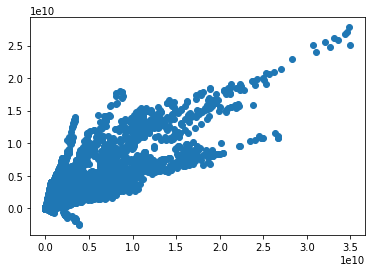

In [33]:
plt.scatter(y_test,pred)

In [34]:
from sklearn import metrics
metrics.r2_score(y_test,pred)

0.7675081145413867

In [35]:
metrics.mean_squared_error(y_test,pred)

5.263130476872745e+16

## Use Ridge, Lasso, Elastic Net

In [36]:
# Ridge
ridge = Ridge(alpha=0.001)
ridge.fit(x_train,y_train)

pred_rid = ridge.predict(x_test)


print("predict : ",pred_rid)
print("r2_score : ",metrics.r2_score(y_test,pred_rid))

predict :  [ 3.68731769e+08 -4.89350959e+07 -1.77850351e+07 ...  2.19806612e+07
  1.03642180e+06 -3.32437234e+07]
r2_score :  0.7675302110700702


In [37]:
# Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(x_train,y_train)

pred_las = lasso.predict(x_test)


print("predict : ",pred_las)
print("r2_score : ",metrics.r2_score(y_test,pred_las))

predict :  [ 3.68816717e+08 -4.89473422e+07 -1.77859999e+07 ...  2.19003544e+07
  1.02215107e+06 -3.31924498e+07]
r2_score :  0.7675087247769328


/home/sundooedu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4381767356179205e+20, tolerance: 1.0361302776996986e+18
  positive)


In [38]:
# ElasticNet
eln = ElasticNet(alpha=0.001)
eln.fit(x_train,y_train)

pred_eln = eln.predict(x_test)


print("predict : ",pred_eln)
print("r2_score : ",metrics.r2_score(y_test,pred_eln))

predict :  [ 2.56991187e+08 -4.05041564e+07 -2.80870701e+07 ...  1.15443941e+08
 -1.39698547e+06  2.28686794e+06]
r2_score :  0.5397675921125645


/home/sundooedu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2488963704263326e+21, tolerance: 1.0361302776996986e+18
  positive)


In [39]:
pred_eln

array([ 2.56991187e+08, -4.05041564e+07, -2.80870701e+07, ...,
        1.15443941e+08, -1.39698547e+06,  2.28686794e+06])

In [40]:
model= tf.keras.Sequential()

In [53]:
model.add(layers.Input(shape=x_train.shape[1]))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [54]:
hist = model.fit(x_train,y_train,epochs=5 , batch_size = 128 , validation_split =0.2)

Epoch 1/5
265/265 [==============================] - 1s 2ms/step - loss: 235093813859713024.0000 - accuracy: 0.0000e+00 - val_loss: 281704688741515264.0000 - val_accuracy: 0.0000e+00
Epoch 2/5
265/265 [==============================] - 1s 2ms/step - loss: 234842008517083136.0000 - accuracy: 0.0000e+00 - val_loss: 281480560168140800.0000 - val_accuracy: 0.0000e+00
Epoch 3/5
265/265 [==============================] - 1s 2ms/step - loss: 234466782994235392.0000 - accuracy: 0.0000e+00 - val_loss: 281427062055501824.0000 - val_accuracy: 0.0000e+00
Epoch 4/5
265/265 [==============================] - 1s 2ms/step - loss: 234276773641060352.0000 - accuracy: 0.0000e+00 - val_loss: 280920273094443008.0000 - val_accuracy: 0.0000e+00
Epoch 5/5
265/265 [==============================] - 1s 2ms/step - loss: 233862206217781248.0000 - accuracy: 0.0000e+00 - val_loss: 280881257611526144.0000 - val_accuracy: 0.0000e+00


In [47]:
model.evaluate(x_test,y_test, batch_size=128)

7931/7931 [==============================] - 7s 865us/step - loss: 226572753363271680.0000 - accuracy: 0.0000e+00


[2.2657275336327168e+17, 0.0]

In [48]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

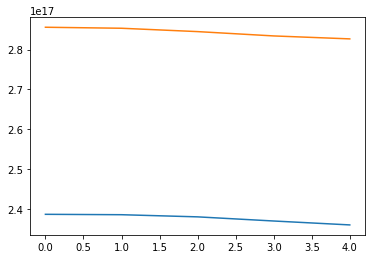

In [49]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

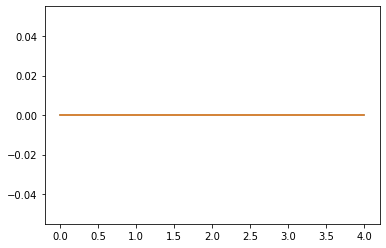

In [50]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

## Year & month

In [ ]:
x_test_1.columns[:]

In [ ]:
x_test_1 = x_test.reset_index(drop=True)

In [ ]:
type(x_test_1)

In [ ]:
#year
year = x_test_1[['year_2019','year_2020']].idxmax(1)

In [ ]:
year.replace("year_2019","2019").replace("year_2020","2020")

In [ ]:
# month
month =x_test_1[['month_1','month_2', 'month_3', 'month_4', 'month_5',\
                'month_6','month_7', 'month_8', 'month_9', 'month_10',\
                'month_11','month_12']].idxmax(1)
month

In [ ]:
month = month.replace("month_1","1").replace("month_2","2").replace("month_3","3").replace("month_4","4").replace("month_5","5")\
.replace("month_6","6").replace("month_7","7").replace("month_8","8").replace("month_9","9").replace("month_10","10")\
.replace("month_11","11").replace("month_12","12")

In [ ]:
#CARD_SIDO_NM
x_test_1.columns[19:36]

In [ ]:
card_sido = x_test_1[['CARD_SIDO_NM_강원', 'CARD_SIDO_NM_경기', 'CARD_SIDO_NM_경남',
       'CARD_SIDO_NM_경북', 'CARD_SIDO_NM_광주', 'CARD_SIDO_NM_대구',
       'CARD_SIDO_NM_대전', 'CARD_SIDO_NM_부산', 'CARD_SIDO_NM_서울',
       'CARD_SIDO_NM_세종', 'CARD_SIDO_NM_울산', 'CARD_SIDO_NM_인천',
       'CARD_SIDO_NM_전남', 'CARD_SIDO_NM_전북', 'CARD_SIDO_NM_제주',
       'CARD_SIDO_NM_충남', 'CARD_SIDO_NM_충북']].idxmax(1)

In [ ]:
card_sido

In [ ]:
card_sido=card_sido.replace("CARD_SIDO_NM_강원","강원").replace("CARD_SIDO_NM_경기","경기").replace("CARD_SIDO_NM_경남","경남").replace("CARD_SIDO_NM_경북","경북")\
.replace("CARD_SIDO_NM_광주","광주").replace("CARD_SIDO_NM_대구","대구").replace("CARD_SIDO_NM_대전","대전").replace("CARD_SIDO_NM_부산","부산")\
.replace("CARD_SIDO_NM_서울","서울").replace("CARD_SIDO_NM_세종","세종").replace("CARD_SIDO_NM_울산","울산").replace("CARD_SIDO_NM_인천","인천")\
.replace("CARD_SIDO_NM_전남","전남").replace("CARD_SIDO_NM_전북","전북").replace("CARD_SIDO_NM_제주","제주").replace("CARD_SIDO_NM_충남","충남")\
.replace("CARD_SIDO_NM_충북","충북")

In [ ]:
#STD_CLSS_NM_
x_test_1.columns[36:77]

In [ ]:
std_clss = x_test_1[['STD_CLSS_NM_건강보조식품 소매업', 'STD_CLSS_NM_골프장 운영업',
       'STD_CLSS_NM_과실 및 채소 소매업', 'STD_CLSS_NM_관광 민예품 및 선물용품 소매업',
       'STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업', 'STD_CLSS_NM_그외 기타 스포츠시설 운영업',
       'STD_CLSS_NM_그외 기타 종합 소매업', 'STD_CLSS_NM_기타 대형 종합 소매업',
       'STD_CLSS_NM_기타 수상오락 서비스업', 'STD_CLSS_NM_기타 외국식 음식점업',
       'STD_CLSS_NM_기타 주점업', 'STD_CLSS_NM_기타음식료품위주종합소매업',
       'STD_CLSS_NM_내항 여객 운송업', 'STD_CLSS_NM_마사지업', 'STD_CLSS_NM_면세점',
       'STD_CLSS_NM_버스 운송업', 'STD_CLSS_NM_비알콜 음료점업', 'STD_CLSS_NM_빵 및 과자류 소매업',
       'STD_CLSS_NM_서양식 음식점업', 'STD_CLSS_NM_수산물 소매업', 'STD_CLSS_NM_슈퍼마켓',
       'STD_CLSS_NM_스포츠 및 레크레이션 용품 임대업', 'STD_CLSS_NM_여관업', 'STD_CLSS_NM_여행사업',
       'STD_CLSS_NM_욕탕업', 'STD_CLSS_NM_육류 소매업', 'STD_CLSS_NM_일반유흥 주점업',
       'STD_CLSS_NM_일식 음식점업', 'STD_CLSS_NM_자동차 임대업', 'STD_CLSS_NM_전시 및 행사 대행업',
       'STD_CLSS_NM_정기 항공 운송업', 'STD_CLSS_NM_중식 음식점업',
       'STD_CLSS_NM_차량용 가스 충전업', 'STD_CLSS_NM_차량용 주유소 운영업',
       'STD_CLSS_NM_체인화 편의점', 'STD_CLSS_NM_택시 운송업',
       'STD_CLSS_NM_피자 햄버거 샌드위치 및 유사 음식점업', 'STD_CLSS_NM_한식 음식점업',
       'STD_CLSS_NM_호텔업', 'STD_CLSS_NM_화장품 및 방향제 소매업', 'STD_CLSS_NM_휴양콘도 운영업']].idxmax(1)

In [ ]:
std_clss=std_clss.replace("STD_CLSS_NM_건강보조식품 소매업","건강보조식품 소매업").replace("STD_CLSS_NM_골프장 운영업","골프장 운영업")\
.replace("STD_CLSS_NM_과실 및 채소 소매업","과실 및 채소 소매업").replace("STD_CLSS_NM_관광 민예품 및 선물용품 소매업","관광 민예품 및 선물용품 소매업")\
.replace("STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업","그외 기타 분류안된 오락관련 서비스업").replace("STD_CLSS_NM_그외 기타 스포츠시설 운영업","그외 기타 스포츠시설 운영업")\
.replace("STD_CLSS_NM_그외 기타 종합 소매업","그외 기타 종합 소매업").replace("STD_CLSS_NM_기타 대형 종합 소매업","기타 대형 종합 소매업")\
.replace("STD_CLSS_NM_기타 수상오락 서비스업","기타 수상오락 서비스업").replace("STD_CLSS_NM_기타 외국식 음식점업","기타 외국식 음식점업")\
.replace("STD_CLSS_NM_기타 주점업","기타 주점업").replace("STD_CLSS_NM_기타음식료품위주종합소매업","기타음식료품위주종합소매업")\
.replace("STD_CLSS_NM_내항 여객 운송업","내항 여객 운송업").replace("STD_CLSS_NM_마사지업","마사지업").replace("STD_CLSS_NM_면세점","면세점")\
.replace("STD_CLSS_NM_버스 운송업","버스 운송업").replace("STD_CLSS_NM_비알콜 음료점업","비알콜 음료점업").replace("STD_CLSS_NM_빵 및 과자류 소매업","빵 및 과자류 소매업")\
.replace("STD_CLSS_NM_서양식 음식점업","서양식 음식점업").replace("STD_CLSS_NM_수산물 소매업","수산물 소매업").replace("STD_CLSS_NM_슈퍼마켓","슈퍼마켓")\
.replace("STD_CLSS_NM_스포츠 및 레크레이션 용품 임대업","스포츠 및 레크레이션 용품 임대업").replace("STD_CLSS_NM_여관업","여관업").replace("STD_CLSS_NM_여행사업","여행사업")\
.replace("STD_CLSS_NM_욕탕업","욕탕업").replace("STD_CLSS_NM_육류 소매업","육류 소매업").replace("STD_CLSS_NM_일반유흥 주점업","일반유흥 주점업")\
.replace("STD_CLSS_NM_일식 음식점업","일식 음식점업").replace("STD_CLSS_NM_자동차 임대업","자동차 임대업").replace("STD_CLSS_NM_전시 및 행사 대행업","전시 및 행사 대행업")\
.replace("STD_CLSS_NM_정기 항공 운송업","정기 항공 운송업").replace("STD_CLSS_NM_중식 음식점업","중식 음식점업")\
.replace("STD_CLSS_NM_차량용 가스 충전업","차량용 가스 충전업").replace("STD_CLSS_NM_차량용 주유소 운영업","차량용 주유소 운영업")\
.replace("STD_CLSS_NM_체인화 편의점","체인화 편의점").replace("STD_CLSS_NM_택시 운송업","택시 운송업")\
.replace("STD_CLSS_NM_피자 햄버거 샌드위치 및 유사 음식점업","피자 햄버거 샌드위치 및 유사 음식점업").replace("STD_CLSS_NM_한식 음식점업","한식 음식점업")\
.replace("STD_CLSS_NM_호텔업","호텔업").replace("STD_CLSS_NM_화장품 및 방향제 소매업","화장품 및 방향제 소매업").replace("STD_CLSS_NM_휴양콘도 운영업","휴양콘도 운영업")

In [ ]:
std_clss.describe()

In [ ]:
std_clss

In [ ]:
result = pred

In [ ]:
result

In [ ]:
y_test

# predict